## 2 )

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import src.data_handler as data_handler
import src.models as models
import os
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

In [2]:
MNIST_df : pd.DataFrame = pd.read_csv(f"{project_root}/TP04/data/raw/MNIST_dataset.csv")
MNIST_df.info()
MNIST_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 419.2 MB


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X : np.ndarray = MNIST_df.iloc[:, 1:].to_numpy()
Y_labels : np.ndarray = MNIST_df.iloc[:, 0].to_numpy()
# features_normalized : np.ndarray = (features - features.mean(axis=0, keepdims=True)) / features.std(axis=0, keepdims=True)

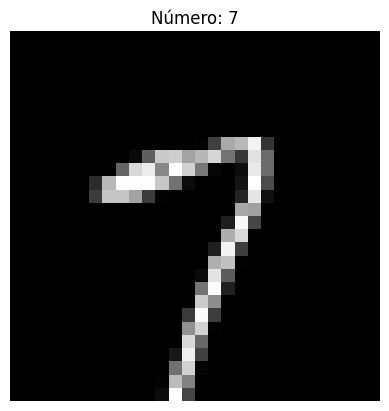

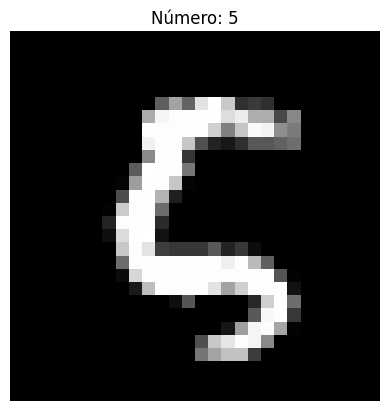

In [4]:
def plot_mnist_image(index: int, X : np.ndarray) -> None:
    image : np.ndarray = X[index].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Número: {Y_labels[index]}")
    plt.axis('off')
    plt.show()
plot_mnist_image(13000, X)
plot_mnist_image(2000, X)

### a )

In [5]:
pca : models.PCA = models.PCA(X)
pca.reduce_dimensionality(700)

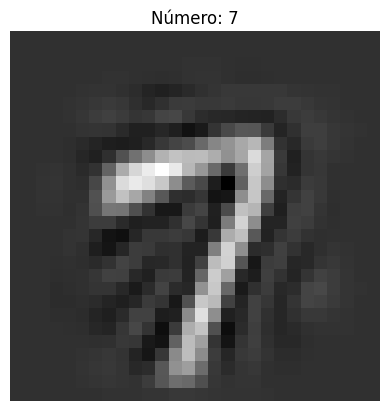

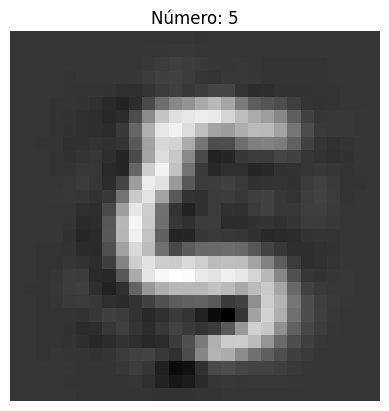

In [6]:
plot_mnist_image(13000, pca.X_reconstruction)
plot_mnist_image(2000, pca.X_reconstruction)

In [7]:
pca.reduce_dimensionality(0)
print(pca.get_reconstruction_MSE())

1.381510957040037e-26


In [8]:
MSEs : list[float] = []
ks : list[int] = list(range(0, X.shape[1] - 1, 25))
for k in ks:
    if k % 100 == 0:
        print(k)
    pca.reduce_dimensionality(k)
    MSEs.append(pca.get_reconstruction_MSE())

0
100
200
300
400
500
600
700


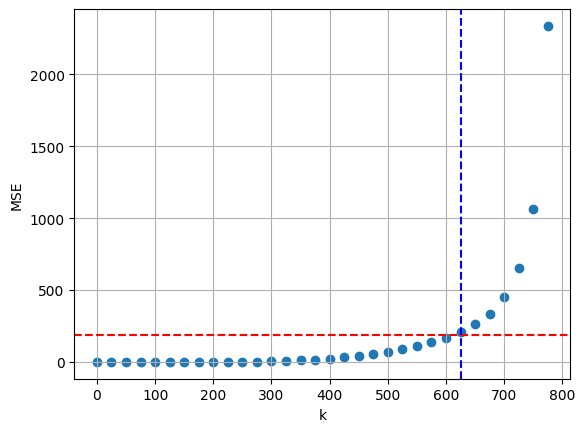

In [9]:
MSEs : np.ndarray = np.array(MSEs)
mse_mean : float = MSEs.mean()
plt.scatter(ks, MSEs)
plt.xlabel("k")
plt.ylabel("MSE")
plt.grid(True)
plt.axhline(mse_mean, color='red', linestyle='--')
plt.axvline(ks[np.argmin(np.abs(MSEs - mse_mean))], color='blue', linestyle='--')